In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -qqq h5py

In [3]:
!pip install --upgrade -qqq gensim

In [4]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# !pip install tensorflow==2.12.0

In [ ]:
!pip install -U SpaCy==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 33.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [5]:
## Import required libraries

## warnings
import warnings
warnings.filterwarnings("ignore")

## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

## T-Sne
from yellowbrick.text import TSNEVisualizer
from sklearn import manifold

## Train-Test Split
from sklearn.model_selection import train_test_split

## Feature selection
from sklearn import feature_selection

## libraraies for classification
from sklearn.pipeline import Pipeline
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

## for saving model
import pickle

## for explainer
#from lime import lime_text

## detokenization
from nltk.tokenize.treebank import TreebankWordDetokenizer

## for word embedding with gensim
import gensim
import gensim.downloader as gensim_api
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tensorflow.keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences


## for word embedding with Spacy
import spacy
import en_core_web_lg

## for deep learning
from keras.models import load_model
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, MaxPooling1D
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
import tensorflow as tf
import keras
from keras.layers import Lambda
import tensorflow as tf
from keras.models import model_from_json

## for bert language model
#import transformers

## Loading the dataset:

In [6]:
df_all = pd.read_csv("/content/drive/MyDrive/2024/Depression data/SocialMEdiDepress/data/now_processed_data.csv", encoding='utf-8')

In [7]:
df=df_all.sample(n=5000,random_state=1)

In [8]:
df.label.value_counts()

label
0    2612
1    2388
Name: count, dtype: int64

In [9]:
df.reset_index(drop=True,inplace=True)

### **EDA**


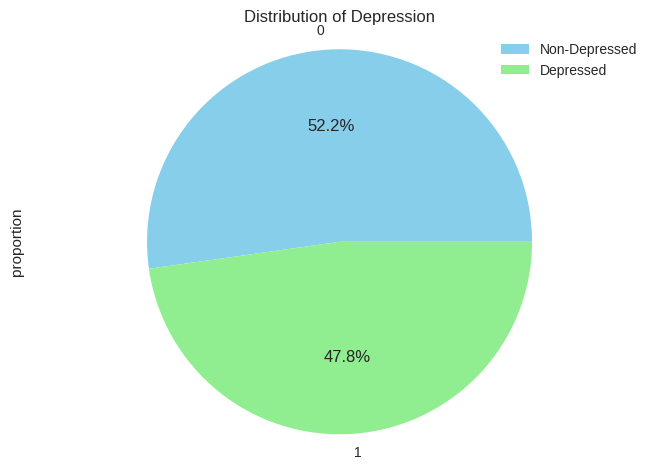

In [10]:
df["label"].value_counts(normalize=True).plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "lightgreen"])
plt.axis('equal')
plt.title('Distribution of Depression')
plt.legend(labels=["Non-Depressed", "Depressed"])
plt.show()

### Preparation

In [11]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [12]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
df.head()

,text,label,clean_text
0,#musicmonday Daniel merriweathers live lounge ...,0,daniel merriweathers live lounge performance g...
1,"I’m not sure if it’s our QB, WR’ers, OL or ALL...",1,sure qb wr ers ol truly embarrassing nfl team ...
2,#dontfollowsunday @mileycyrus @ddlovato and an...,0,mileycyrus ddlovato disney children
3,@_DiDi_ r u in a bad mood today or just havin ...,0,didi r u bad mood today havin bad day ms didi
4,how do you build the tallest tower the biggest...,0,build tallest tower biggest canal tallest brid...


## **Deep Larning  models**

### LSTM model:

In [13]:
s=set()
for i in range(len(df)):
    k=df["clean_text"][i].split()
    for j in range(len(k)):
        s.add(k[j])
len(s)

12065

In [14]:
voc_size=18611
onehot_repr1=[one_hot(words,voc_size)for words in df["clean_text"]]


In [15]:
max=0
for i in onehot_repr1:
    if len(i)>max:
        max=len(i)


sent_length=max
print(sent_length)
embedded_docs1=pad_sequences(onehot_repr1,padding='pre',maxlen=sent_length)

33


In [ ]:
embedded_docs1.shape

(5000, 33)

In [ ]:
Y=df["label"]

In [ ]:
#Split for train_test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(embedded_docs1,Y,test_size=0.2,random_state=10,stratify=Y)


In [ ]:
embedding_vector_features=sent_length*2
lstm_model=Sequential()
lstm_model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
lstm_model.add((LSTM(100)))
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 33, 66)            1228326   
                                                                 
 lstm_2 (LSTM)               (None, 100)               66800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1295227 (4.94 MB)
Trainable params: 1295227 (4.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)



(4000, 33) (4000,) (1000, 33) (1000,)


In [ ]:
hist=lstm_model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20,batch_size=16)


Epoch 1/20
250/250 [==============================] - 14s 47ms/step - loss: 0.5011 - accuracy: 0.7495 - val_loss: 0.3902 - val_accuracy: 0.8240
Epoch 2/20
250/250 [==============================] - 9s 38ms/step - loss: 0.2049 - accuracy: 0.9183 - val_loss: 0.4252 - val_accuracy: 0.8020
Epoch 3/20
250/250 [==============================] - 10s 42ms/step - loss: 0.0870 - accuracy: 0.9682 - val_loss: 0.6148 - val_accuracy: 0.7930
Epoch 4/20
250/250 [==============================] - 13s 52ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.6312 - val_accuracy: 0.7980
Epoch 5/20
250/250 [==============================] - 10s 42ms/step - loss: 0.0230 - accuracy: 0.9937 - val_loss: 0.8585 - val_accuracy: 0.7820
Epoch 6/20
250/250 [==============================] - 9s 35ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.8110 - val_accuracy: 0.7910
Epoch 7/20
250/250 [==============================] - 10s 42ms/step - loss: 0.0136 - accuracy: 0.9960 - val_loss: 1.0371 - val_accuracy: 0

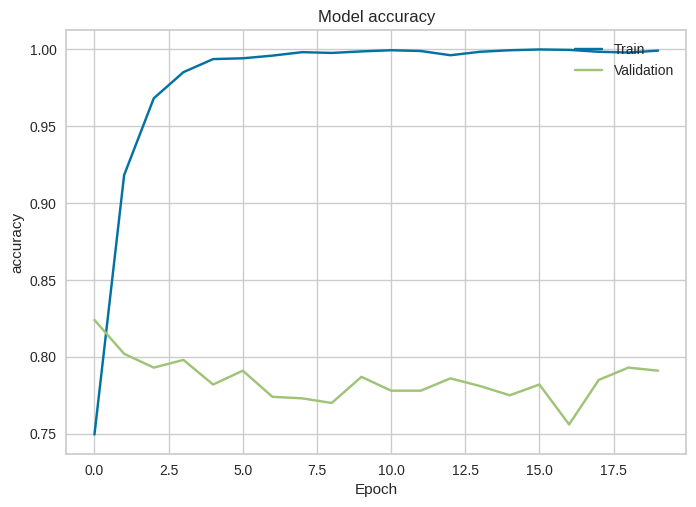

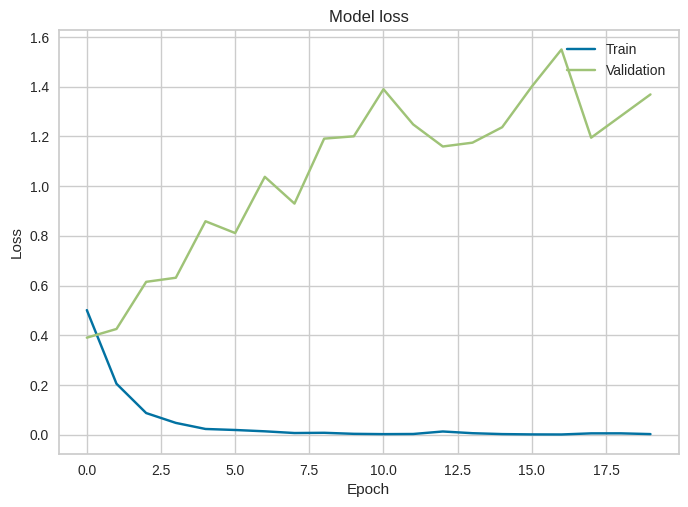

In [ ]:
# Plotting the training and testing accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:

lstm_pred=lstm_model.predict(X_test)
lstm_train_pred=lstm_model.predict(X_train)

125/125 [==============================] - 1s 12ms/step


In [ ]:

lstm_pred=(lstm_pred>=0.5).astype("int")
lstm_train_pred=(lstm_train_pred>=0.5).astype("int")

In [ ]:
cm = confusion_matrix(Y_test, lstm_pred)

In [ ]:

class_labels = np.unique(Y_test)

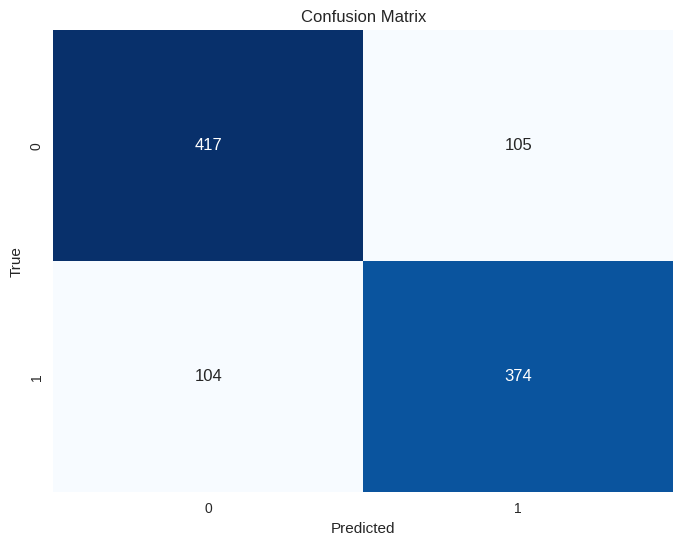

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
report = classification_report(Y_test, lstm_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       522
           1       0.78      0.78      0.78       478

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



In [ ]:
lstm_train_result=accuracy_score(Y_train,lstm_train_pred)
lstm_test_result=accuracy_score(Y_test,lstm_pred)

In [ ]:
print("Train Result: ",lstm_train_result)
print("Test Result: ",lstm_test_result)

Train Result:  0.99975
Test Result:  0.791


In [ ]:
# ## Running the classification models
# results = []
# names = []
# kfold_results = []
# test_results = []
# train_results = []


In [ ]:
# # compare algorithms
# from matplotlib import pyplot
# fig = pyplot.figure()
# ind = np.arange(len(names))  # the x locations for the groups
# width = 0.35  # the width of the bars
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
# pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
# fig.set_size_inches(15,8)
# pyplot.legend()
# ax.set_xticks(ind)
# ax.set_xticklabels(names)
# pyplot.show()




### RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

rnn_model = Sequential()
rnn_model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
rnn_model.add(SimpleRNN(100))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(rnn_model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 33, 66)            1228326   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               16700     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1245127 (4.75 MB)
Trainable params: 1245127 (4.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
hist=rnn_model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20,batch_size=16)


Epoch 1/20
250/250 [==============================] - 19s 59ms/step - loss: 0.5785 - accuracy: 0.6752 - val_loss: 0.4887 - val_accuracy: 0.7630
Epoch 2/20
250/250 [==============================] - 16s 66ms/step - loss: 0.1839 - accuracy: 0.9312 - val_loss: 0.4746 - val_accuracy: 0.7790
Epoch 3/20
250/250 [==============================] - 17s 68ms/step - loss: 0.0376 - accuracy: 0.9898 - val_loss: 0.5857 - val_accuracy: 0.7830
Epoch 4/20
250/250 [==============================] - 16s 62ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.6677 - val_accuracy: 0.7740
Epoch 5/20
250/250 [==============================] - 14s 56ms/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.7491 - val_accuracy: 0.7790
Epoch 6/20
250/250 [==============================] - 13s 54ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.8052 - val_accuracy: 0.7710
Epoch 7/20
250/250 [==============================] - 12s 49ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8402 - val_accuracy:

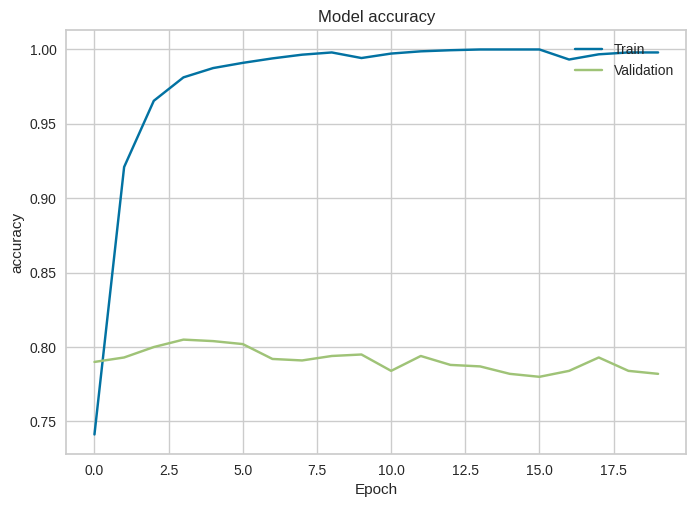

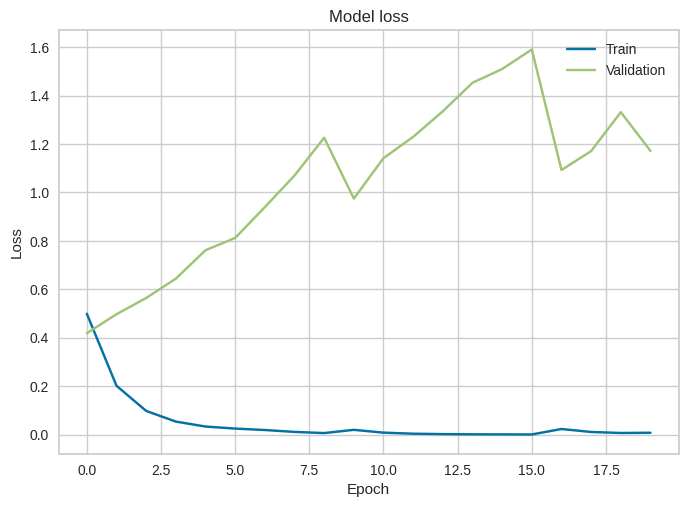

In [ ]:
# Plotting the training and testing accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
rnn_pred=rnn_model.predict(X_test)
rnn_train_pred=rnn_model.predict(X_train)

125/125 [==============================] - 0s 4ms/step


In [ ]:

rnn_pred=(rnn_pred>=0.5).astype("int")
rnn_train_pred=(rnn_train_pred>=0.5).astype("int")

In [ ]:
cm = confusion_matrix(Y_test, rnn_pred)

In [ ]:

class_labels = np.unique(Y_test)

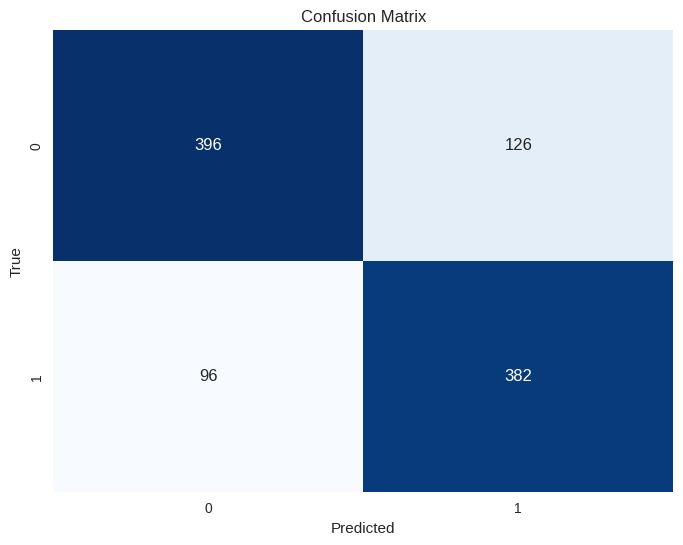

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
report = classification_report(Y_test, rnn_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       522
           1       0.75      0.80      0.77       478

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



In [ ]:
rnn_train_result=accuracy_score(Y_train,rnn_train_pred)
rnn_test_result=accuracy_score(Y_test,rnn_pred)

In [ ]:
print("Train Result: ",rnn_train_result)
print("Test Result: ",rnn_test_result)

Train Result:  1.0
Test Result:  0.778


In [ ]:
# ## Running the classification models
# results = []
# names = []
# kfold_results = []
# test_results = []
# train_results = []


In [ ]:
# # compare algorithms
# from matplotlib import pyplot
# fig = pyplot.figure()
# ind = np.arange(len(names))  # the x locations for the groups
# width = 0.35  # the width of the bars
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
# pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
# fig.set_size_inches(15,8)
# pyplot.legend()
# ax.set_xticks(ind)
# ax.set_xticklabels(names)
# pyplot.show()

### BILSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

bilstm_model = Sequential()
bilstm_model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
bilstm_model.add(Bidirectional(LSTM(100)))
bilstm_model.add(Dense(1, activation='sigmoid'))
bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(bilstm_model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 33, 66)            1228326   
                                                                 
 bidirectional (Bidirection  (None, 200)               133600    
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 1362127 (5.20 MB)
Trainable params: 1362127 (5.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
hist=bilstm_model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20,batch_size=16)

Epoch 1/20
250/250 [==============================] - 18s 56ms/step - loss: 0.4993 - accuracy: 0.7412 - val_loss: 0.4189 - val_accuracy: 0.7900
Epoch 2/20
250/250 [==============================] - 13s 52ms/step - loss: 0.2017 - accuracy: 0.9210 - val_loss: 0.4972 - val_accuracy: 0.7930
Epoch 3/20
250/250 [==============================] - 13s 52ms/step - loss: 0.0978 - accuracy: 0.9655 - val_loss: 0.5643 - val_accuracy: 0.8000
Epoch 4/20
250/250 [==============================] - 13s 53ms/step - loss: 0.0537 - accuracy: 0.9812 - val_loss: 0.6440 - val_accuracy: 0.8050
Epoch 5/20
250/250 [==============================] - 14s 56ms/step - loss: 0.0333 - accuracy: 0.9875 - val_loss: 0.7615 - val_accuracy: 0.8040
Epoch 6/20
250/250 [==============================] - 15s 61ms/step - loss: 0.0249 - accuracy: 0.9910 - val_loss: 0.8123 - val_accuracy: 0.8020
Epoch 7/20
250/250 [==============================] - 14s 58ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.9396 - val_accuracy:

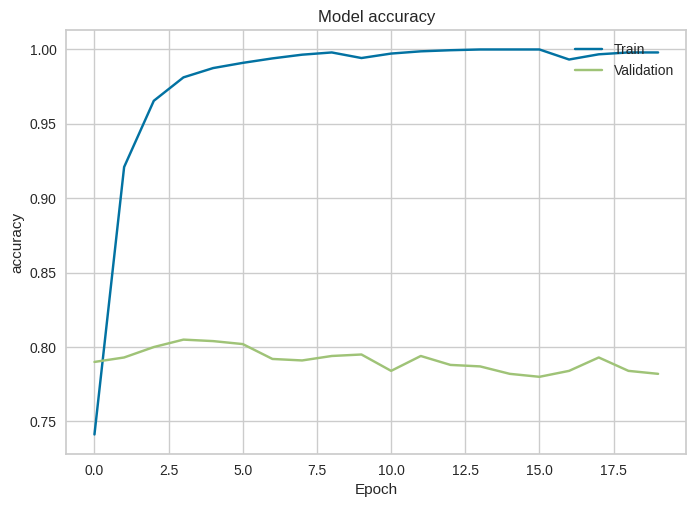

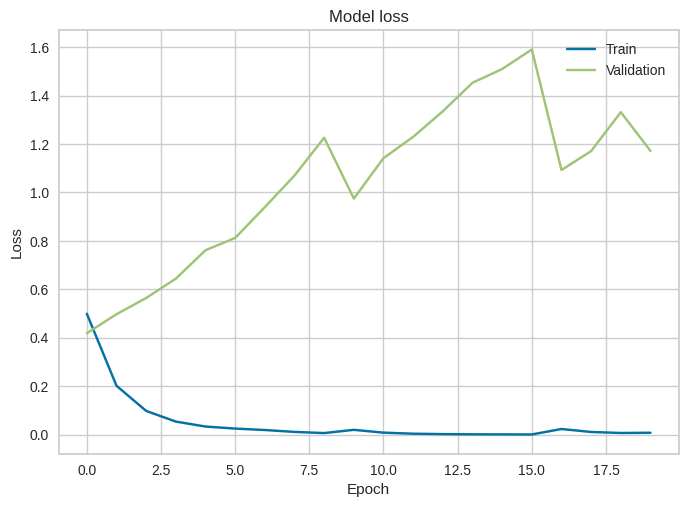

In [ ]:
# Plotting the training and testing accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
bilstm_pred=bilstm_model.predict(X_test)
bilstm_train_pred=bilstm_model.predict(X_train)

125/125 [==============================] - 4s 29ms/step


In [ ]:

bilstm_pred=(bilstm_pred>=0.5).astype("int")
bilstm_train_pred=(bilstm_train_pred>=0.5).astype("int")

In [ ]:
cm = confusion_matrix(Y_test, bilstm_pred)

In [ ]:

class_labels = np.unique(Y_test)

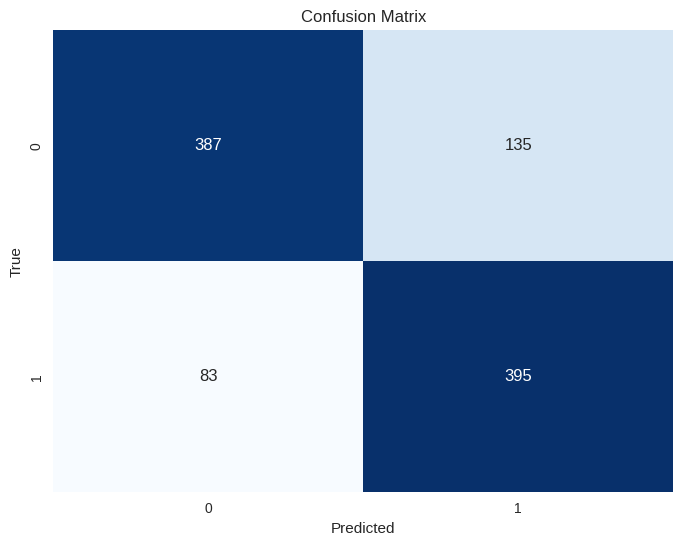

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
report = classification_report(Y_test, bilstm_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       522
           1       0.75      0.83      0.78       478

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.79      0.78      0.78      1000



In [ ]:
bilstm_train_result=accuracy_score(Y_train,bilstm_train_pred)
bilstm_test_result=accuracy_score(Y_test,bilstm_pred)

In [ ]:
print("Train Result: ",bilstm_train_result)
print("Test Result: ",bilstm_test_result)

Train Result:  0.99925
Test Result:  0.782


In [ ]:
# ## Running the classification models
# results = []
# names = []
# kfold_results = []
# test_results = []
# train_results = []


In [ ]:
# # compare algorithms
# from matplotlib import pyplot
# fig = pyplot.figure()
# ind = np.arange(len(names))  # the x locations for the groups
# width = 0.35  # the width of the bars
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
# pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
# fig.set_size_inches(15,8)
# pyplot.legend()
# ax.set_xticks(ind)
# ax.set_xticklabels(names)
# pyplot.show()

### **BERT FOR DEPRESSION DETECTION(TRANSFORMER MODEL)**

In [ ]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import pandas as pd
import numpy as np

tweets = df.values[:,0]
labels = df.values[:,1].astype(float)
print (tweets[40], labels[40])


#FF @kyelani please vote for her on  http://bit.ly/y5KKS Miss Twitterworld - she's gorgeous   And doesn't want to be beaten by hairy dude! 0.0


In [ ]:
embeddings = bert_model.encode(tweets, show_progress_bar=True)
print (embeddings.shape)

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

(5000, 768)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels,
                                          test_size=0.2, random_state=42)
print ("Training set shapes:", X_train.shape, y_train.shape)
print ("Test set shapes:", X_test.shape, y_test.shape)

Training set shapes: (4000, 768) (4000,)
Test set shapes: (1000, 768) (1000,)


In [ ]:


from tensorflow.keras import Sequential, layers

classifier = Sequential()
classifier.add (layers.Dense(256, activation='relu', input_shape=(768,)))
classifier.add (layers.Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = classifier.fit (X_train, y_train, epochs=100, batch_size=16,
                      validation_data=(X_test, y_test))

Epoch 1/100
250/250 [==============================] - 4s 8ms/step - loss: 0.2194 - accuracy: 0.9068 - val_loss: 0.1997 - val_accuracy: 0.9230
Epoch 2/100
250/250 [==============================] - 2s 8ms/step - loss: 0.1391 - accuracy: 0.9475 - val_loss: 0.1409 - val_accuracy: 0.9470
Epoch 3/100
250/250 [==============================] - 3s 10ms/step - loss: 0.1008 - accuracy: 0.9630 - val_loss: 0.1301 - val_accuracy: 0.9550
Epoch 4/100
250/250 [==============================] - 3s 11ms/step - loss: 0.0759 - accuracy: 0.9710 - val_loss: 0.1260 - val_accuracy: 0.9520
Epoch 5/100
250/250 [==============================] - 5s 18ms/step - loss: 0.0615 - accuracy: 0.9783 - val_loss: 0.1958 - val_accuracy: 0.9220
Epoch 6/100
250/250 [==============================] - 3s 11ms/step - loss: 0.0427 - accuracy: 0.9852 - val_loss: 0.2290 - val_accuracy: 0.9100
Epoch 7/100
250/250 [==============================] - 2s 8ms/step - loss: 0.0344 - accuracy: 0.9898 - val_loss: 0.1934 - val_accuracy: 0.

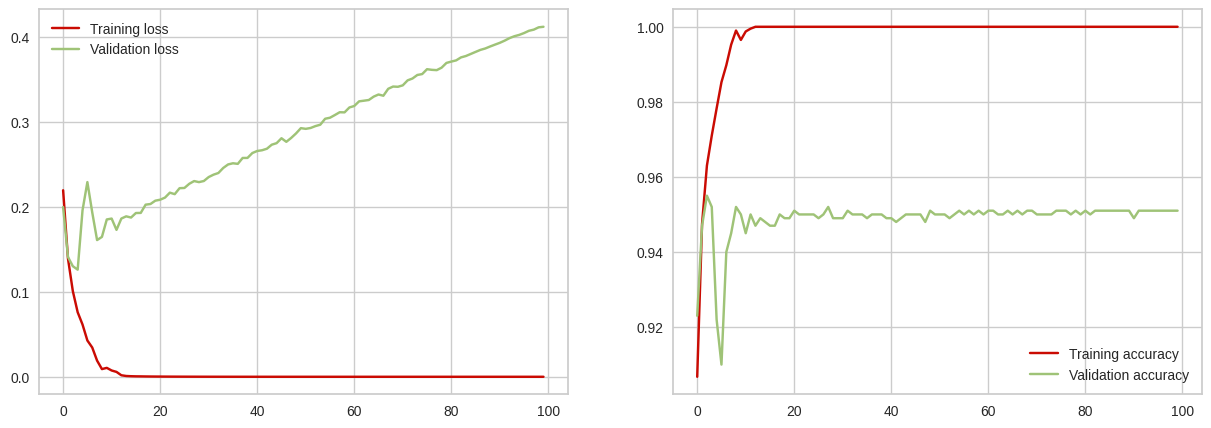

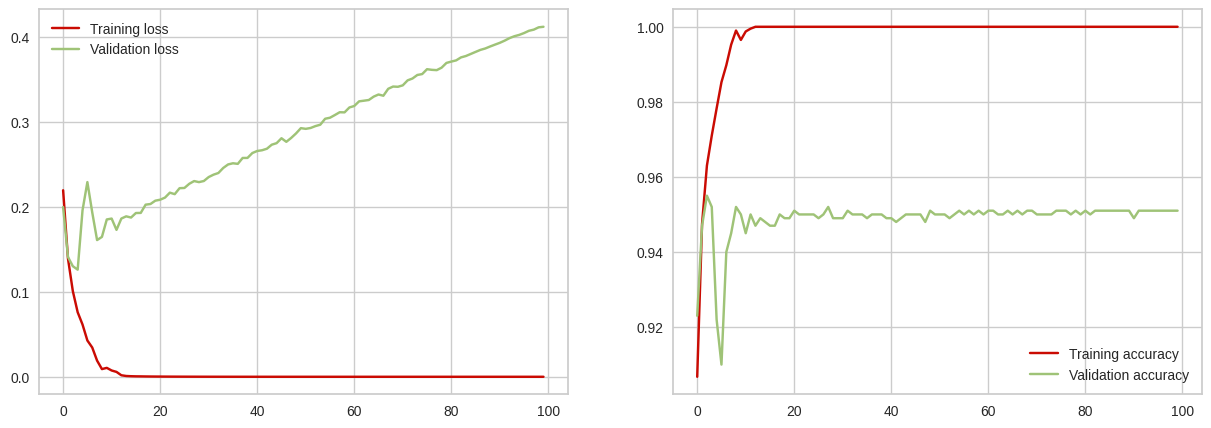

In [ ]:
from matplotlib import pyplot

pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.plot(hist.history['loss'], 'r', label='Training loss')
pyplot.plot(hist.history['val_loss'], 'g', label='Validation loss')
pyplot.legend()
pyplot.subplot(1, 2, 2)
pyplot.plot(hist.history['accuracy'], 'r', label='Training accuracy')
pyplot.plot(hist.history['val_accuracy'], 'g', label='Validation accuracy')
pyplot.legend()
pyplot.show()

125/125 [==============================] - 0s 3ms/step


In [ ]:

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       500
         1.0       0.95      0.95      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [ ]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



cm = confusion_matrix(y_test, y_pred)

class_labels = np.unique(y_test)

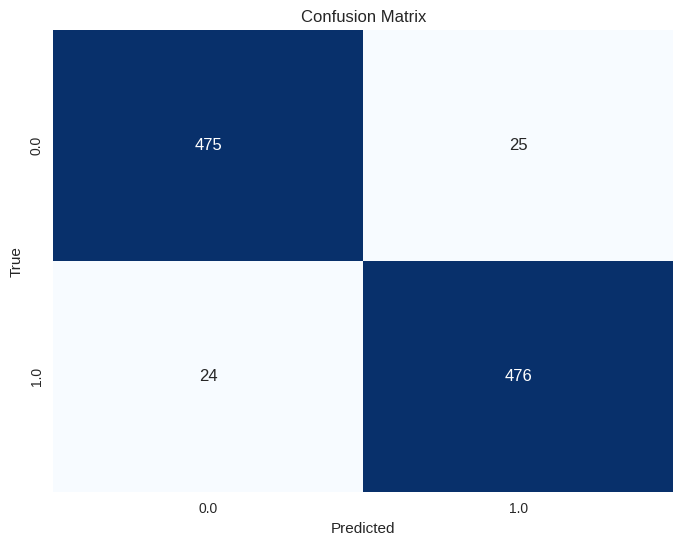

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Save bert model
classifier.save('/content/drive/MyDrive/2024/Depression data/SocialMEdiDepress/models/model_BERT.h5')


#### Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:

y_pred = classifier.predict(X_test)
train_pred=classifier.predict(X_train)


# In[41]:


y_pred = (y_pred > 0.5).astype(int)

train_pred=(train_pred > 0.5).astype(int)

125/125 [==============================] - 0s 2ms/step


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:

class_labels = np.unique(y_test)

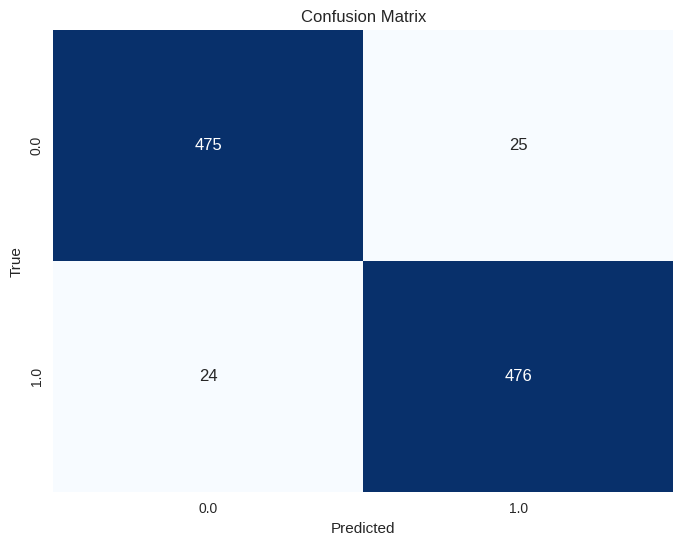

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       500
         1.0       0.95      0.95      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [ ]:
BERT_test_result=accuracy_score(y_test, y_pred)
BERT_train_result=accuracy_score(y_train,train_pred)

In [ ]:
print("Train Result: ",BERT_train_result)
print("Test Result: ",BERT_test_result)

Train Result:  1.0
Test Result:  0.951


In [ ]:
# ## Running the classification models
# results = []
# names = []
# kfold_results = []
# test_results = []
# train_results = []


In [ ]:
# # compare algorithms
# from matplotlib import pyplot
# fig = pyplot.figure()
# ind = np.arange(len(names))  # the x locations for the groups
# width = 0.35  # the width of the bars
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
# pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
# fig.set_size_inches(15,8)
# pyplot.legend()
# ax.set_xticks(ind)
# ax.set_xticklabels(names)
# pyplot.show()

### Compare all the models:

In [ ]:
train_results=[]
test_results=[]
names=[]

In [ ]:
train_results.extend([lstm_train_result,rnn_train_result,bilstm_train_result,BERT_train_result]);test_results.extend([lstm_test_result,rnn_test_result,bilstm_test_result,BERT_test_result])
names.extend(["LSTM","RNN","BILSTM","BERT"])

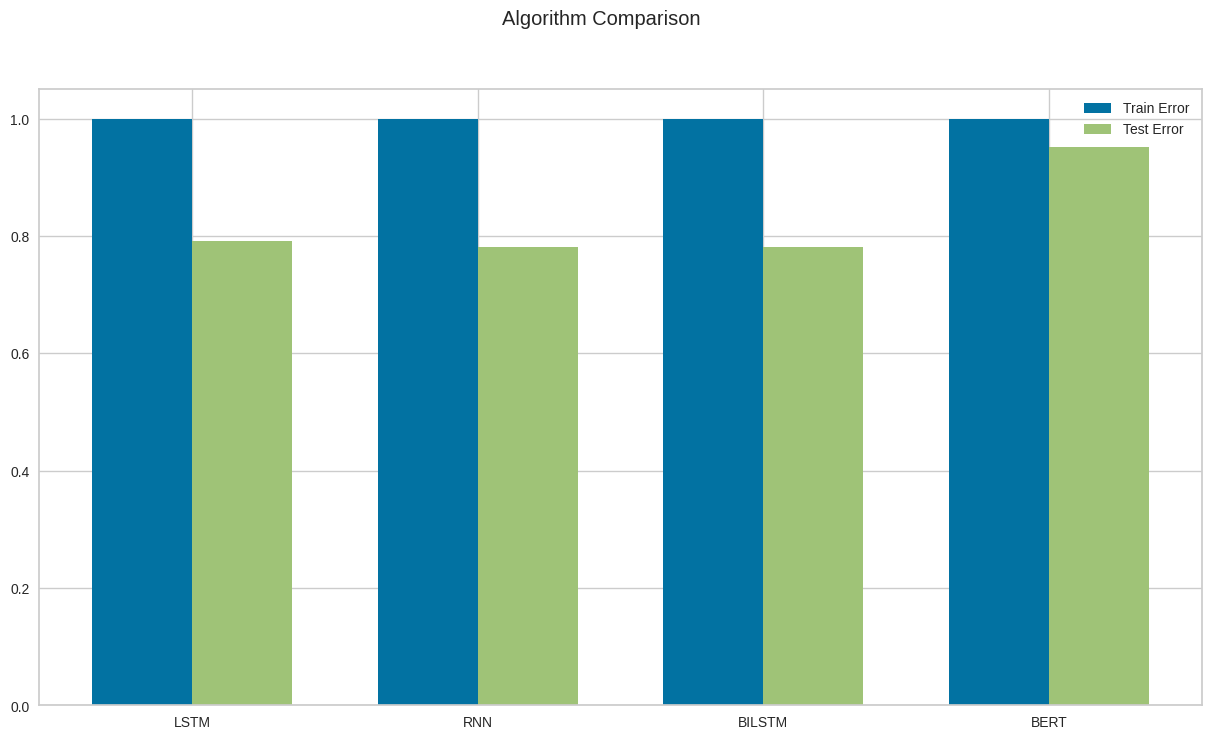

<Figure size 800x550 with 0 Axes>

In [ ]:
# compare algorithms
from matplotlib import pyplot
fig = pyplot.figure()
ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()
plt.savefig('/content/drive/MyDrive/2024/Depression data/SocialMEdiDepress/img/classification_comparision.png')

## Test Model

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# Load the trained BERT model and classifier
# bert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')
classifier = load_model('/content/drive/MyDrive/2024/Depression data/SocialMEdiDepress/models/model_BERT.h5')

# New text data for prediction
new_texts = ["I feel really low today.", "It's been a great day!"]

# Encode new text data using the BERT model
new_embeddings = bert_model.encode(new_texts)

# Make predictions using the classifier
predictions = classifier.predict(new_embeddings)

# Convert probabilities to binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Print the predictions for each text
for i, text in enumerate(new_texts):
    print(f"Text: '{text}' -> Depression: {'Yes' if binary_predictions[i] == 1 else 'No'}")

# Optionally, calculate classification metrics if you have ground truth labels
# y_true = [0, 0]  # Replace with actual labels
# print(classification_report(y_true, binary_predictions))


1/1 [==============================] - 0s 47ms/step
Text: 'I feel really low today.' -> Depression: Yes
Text: 'It's been a great day!' -> Depression: No
